August data project with train and test data setst that have some differences in the features.

# 1. Importing libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from colorama import Fore, Back, Style
import scipy.stats

In [2]:
train = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv',index_col='id')
test = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv',index_col='id')
display(train)
display(test)
both = pd.concat([train[test.columns], test])

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,I,144.74,material_7,material_5,9,5,0,4,9,18.465,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
47341,I,74.53,material_7,material_5,9,5,4,8,7,18.900,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
47342,I,67.73,material_7,material_5,9,5,10,11,2,18.656,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349


# 2. EDA

In [3]:
print(train.failure.value_counts() * 100 / len(train))

0    78.73918
1    21.26082
Name: failure, dtype: float64


Product from train set have 21% of failure. Let's check how many values are missing.

In [4]:
float_cols = [f for f in train.columns if train[f].dtype == float]
pd.concat([train[float_cols].isna().sum().rename('missing values in train'),
           test[float_cols].isna().sum().rename('missing values in test')],
          axis=1)

,missing values in train,missing values in test
loading,250,223
measurement_3,381,329
measurement_4,538,409
measurement_5,676,508
measurement_6,796,624
measurement_7,937,720
measurement_8,1048,846
measurement_9,1227,904
measurement_10,1300,1067
measurement_11,1468,1136


All missing values are in the float columns.

In [5]:
int_cols = [f for f in train.columns if train[f].dtype == int]
int_cols.remove('failure')
string_cols = [f for f in train.columns if train[f].dtype == object]

Now, let's print float columns to see the distribution of the values.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


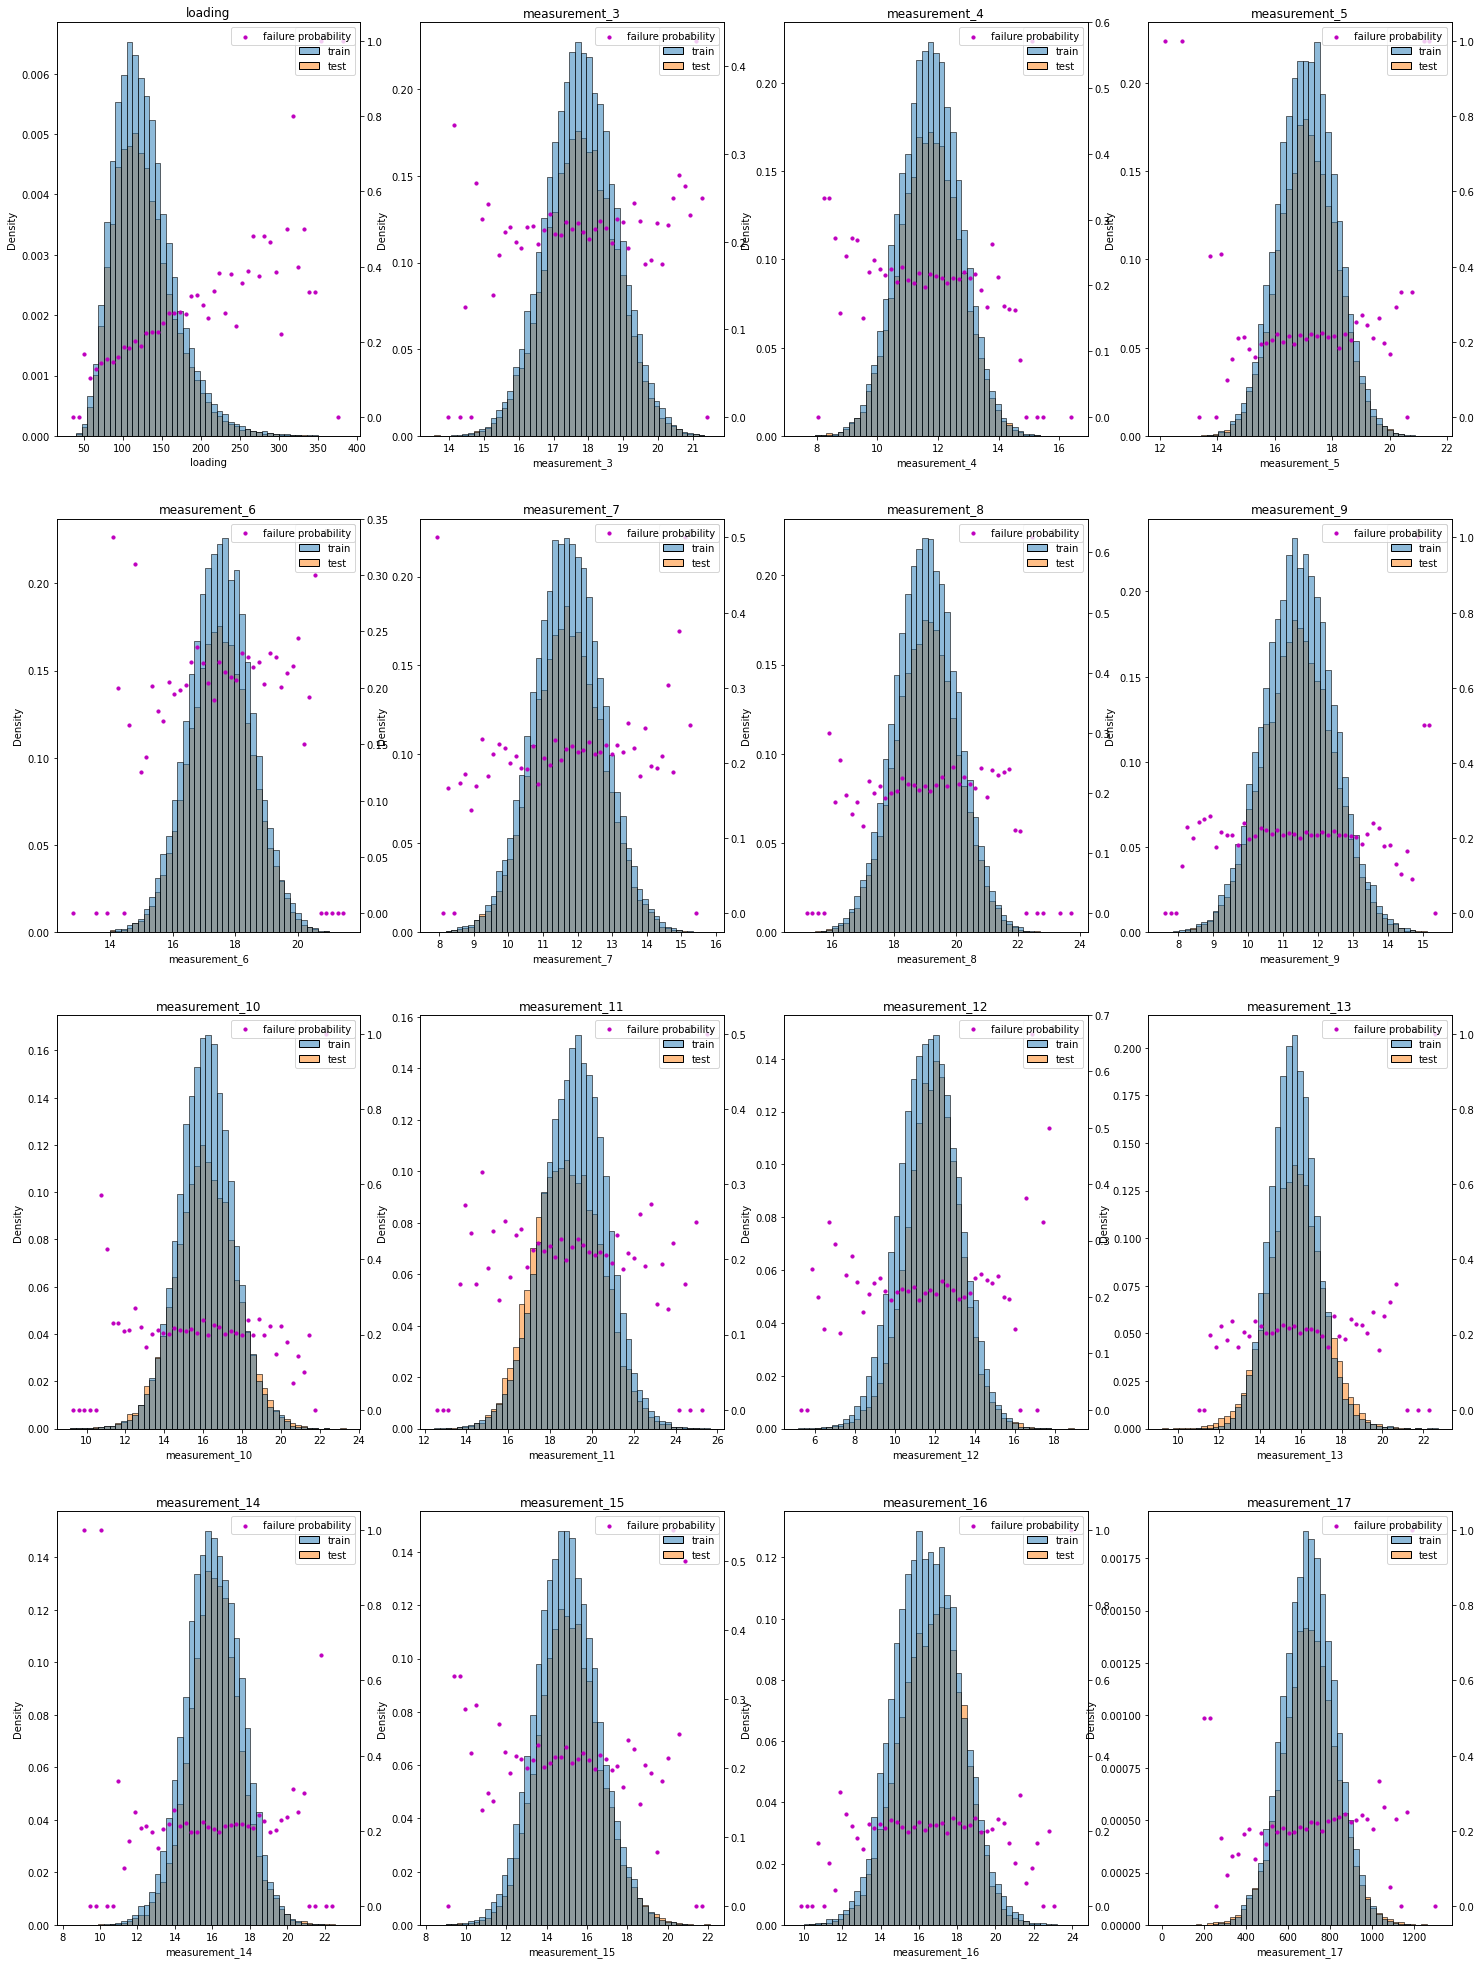

In [6]:
plt.subplots(figsize=(25,35))
train["df"] = "train"
test["df"] = "test"
for i, column in enumerate(float_cols):
    min_val = min(train[column].min(), test[column].min())
    max_val = max(train[column].max(), test[column].max())
    bins = np.linspace(min_val,max_val,50)
    plt.subplot(4,4,i+1)
    sns.histplot(data=pd.concat([train, test]).reset_index(drop=True),bins=bins,stat="density", x=column, hue="df")
    plt.title(column)
    ax2 = plt.twinx()
    total, _ = np.histogram(train[column], bins=bins)
    failures, _ = np.histogram(train[column][train.failure == 1], bins=bins)
    ratio = failures/total
    warnings.filterwarnings('ignore')
    ax2.scatter((bins[1:] + bins[:-1]) / 2, ratio,color='m', s=10, label='failure probability')
    ax2.legend(loc='upper right')

Now we will look at the integer columns.

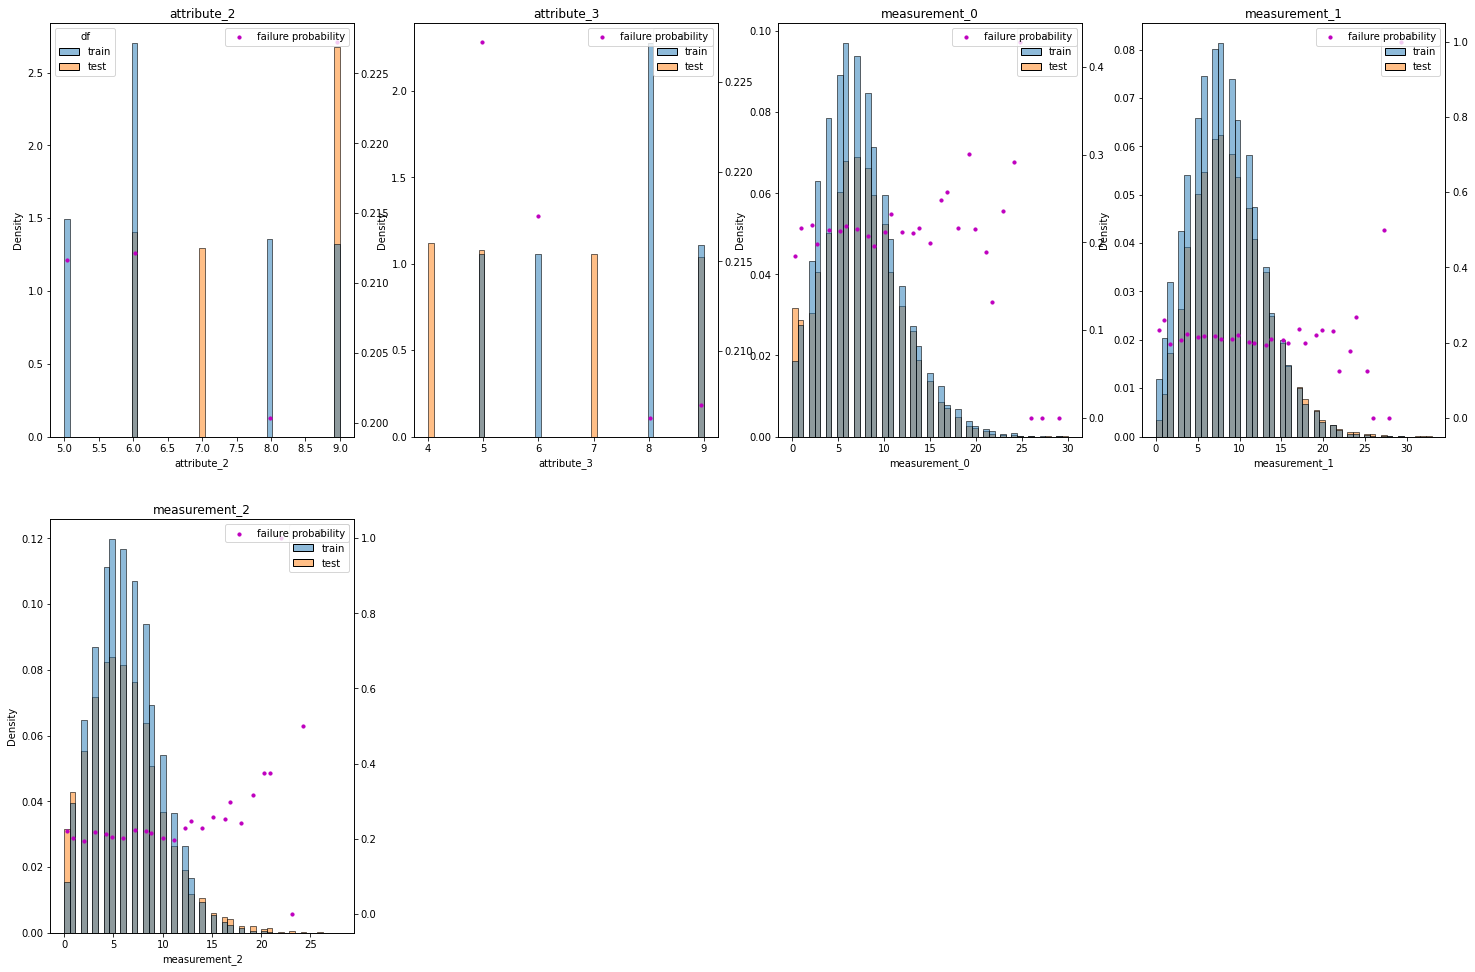

In [7]:
plt.subplots(figsize=(25,35))
for i, column in enumerate(int_cols):
    min_val = min(train[column].min(), test[column].min())
    max_val = max(train[column].max(), test[column].max())
    bins = np.linspace(min_val,max_val,50)
    plt.subplot(4,4,i+1)
    sns.histplot(data=pd.concat([train, test]).reset_index(drop=True),bins=bins,stat="density", x=column, hue="df")
    plt.title(column)
    ax2 = plt.twinx()
    total, _ = np.histogram(train[column], bins=bins)
    failures, _ = np.histogram(train[column][train.failure == 1], bins=bins)
    ratio = failures/total
    warnings.filterwarnings('ignore')
    ax2.scatter((bins[1:] + bins[:-1]) / 2, ratio,color='m', s=10, label='failure probability')
    ax2.legend(loc='upper right')

Looks like measurement 2 has positive correlation with the target. Let's check correlations.

<AxesSubplot:>

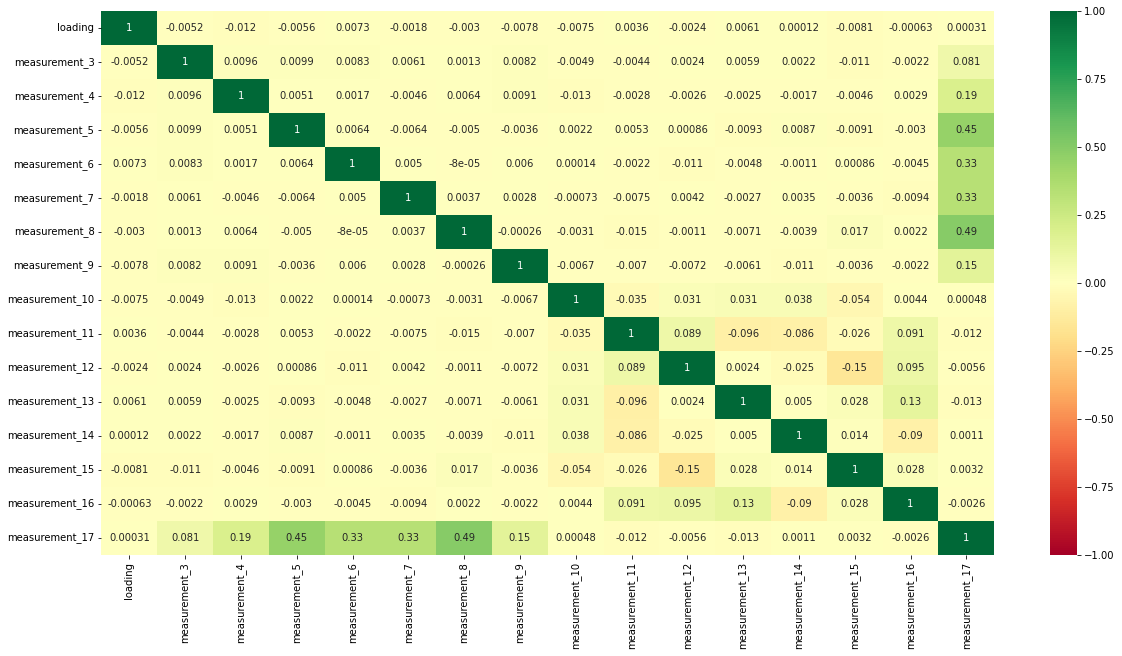

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data=train[float_cols].corr(), annot=True, cmap='RdYlGn',vmin=-1, vmax=1)

Float columns have almost zero correlation for each other.

<AxesSubplot:>

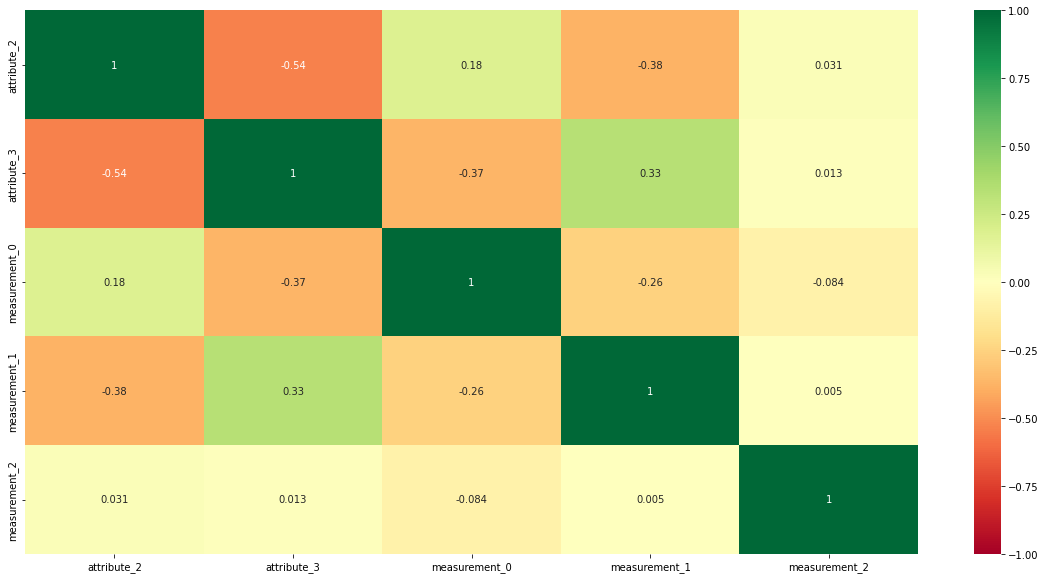

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data=train[int_cols].corr(), annot=True, cmap='RdYlGn',vmin=-1, vmax=1)

Attribute_2 is negatively correlated with the Attribute_3.

Let's check all numerical columns.

In [10]:
num_cols = [f for f in train.columns if train[f].dtype != object]

<AxesSubplot:>

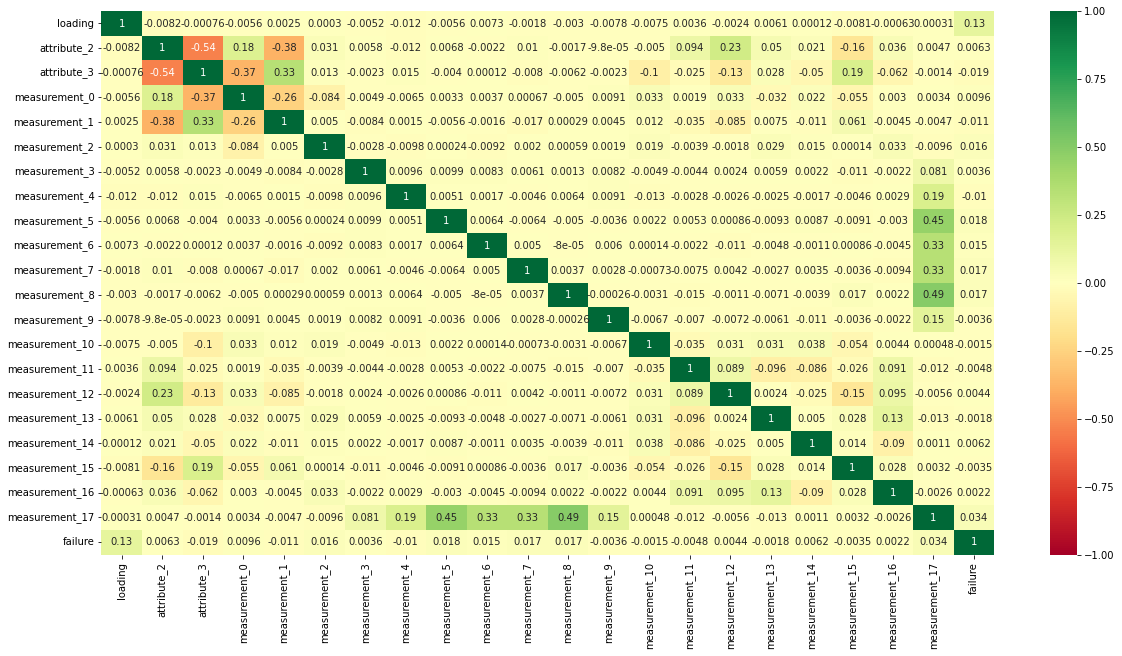

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data=train[num_cols].corr(), annot=True, cmap='RdYlGn',vmin=-1, vmax=1)

Looks the same as it was separately.

Every feature except 'loading' has a normal distribution. Let's see how different data sets are.

In [12]:
train_product = list(train.product_code.unique())
train_product

['A', 'B', 'C', 'D', 'E']

In [13]:
test_product = list(test.product_code.unique())
test_product

['F', 'G', 'H', 'I']

Product codes are different for data sets. This can create a problem for model training.

In [14]:
train_attribute0 = list(train.attribute_0.unique())
display(train_attribute0)
test_attribute0 = list(test.attribute_0.unique())
display(test_attribute0)

['material_7', 'material_5']

['material_5', 'material_7']

Attribute 0 has same material for both data sets.

In [15]:
train_attribute1 = list(train.attribute_1.unique())
display(train_attribute1)
test_attribute1 = list(test.attribute_1.unique())
display(test_attribute1)

['material_8', 'material_5', 'material_6']

['material_6', 'material_7', 'material_5']

Train set has unique material 8 while test set has material 7.

In [16]:
train_attribute2 = list(train.attribute_2.unique())
display(train_attribute2)
test_attribute2 = list(test.attribute_2.unique())
display(test_attribute2)

[9, 8, 5, 6]

[6, 9, 7]

Attribute 2 materials 5 and 8 are unique for the train set and material 7 is unique for the test set.

In [17]:
train_attribute3 = list(train.attribute_3.unique())
display(train_attribute3)
test_attribute3 = list(test.attribute_3.unique())
display(test_attribute3)

[5, 8, 6, 9]

[4, 7, 9, 5]

Materials 8 and 6 for the train set and 4,7 for the test set.

@takanashihumbert has discovered a dependency among the attributes: They are determined by the product code. 

In [18]:
both[string_cols + ['attribute_2', 'attribute_3']].drop_duplicates().set_index('product_code')

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,material_7,material_8,9,5
B,material_5,material_5,8,8
C,material_7,material_8,5,8
D,material_7,material_5,6,6
E,material_7,material_6,6,9
F,material_5,material_6,6,4
G,material_5,material_6,9,7
H,material_7,material_7,7,9
I,material_7,material_5,9,5


In [19]:
train = train.drop('df',axis=1)
test=test.drop('df',axis=1)

# 3. Data preparation and prediction

## 3.1. Importing models

In [20]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, roc_curve


np.set_printoptions(linewidth=150)

Now, let's create some functions that can help us. The first one will be one hot encoder. This encoder is similar to the get_dummies but works very well with unknown categories.

In [21]:
def ohe_f(train_v, val_v, test_v ):
    ohe_attributes = ['attribute_0', 'attribute_1']
    ohe_output = ['ohe0_7', 'ohe1_6', 'ohe1_8']
    ohe = OneHotEncoder(categories=[['material_5', 'material_7'],
                                    ['material_5', 'material_6', 'material_8']],
                        drop='first', sparse=False, handle_unknown='ignore')
    ohe.fit(train_v[ohe_attributes])
    for df in [train_v, val_v, test_v]:
        with warnings.catch_warnings(): # ignore "Found unknown categories"
            warnings.filterwarnings('ignore', category=UserWarning)
            df[ohe_output] = ohe.transform(df[ohe_attributes])
        df.drop(columns=ohe_attributes, inplace=True)



Next will be the function which adds indicators for missing values. 

In [22]:
def miss_ind(train_v, val_v, test_v ):
    for df in [train_v, val_v, test_v ]:
            df['m_3_missing'] = df.measurement_3.isna()
            df['m_5_missing'] = df.measurement_5.isna()

Next function will fill missing data.

In [23]:
def fill_misval(train_v, val_v, test_v):
    features = [f for f in train_v.columns if f == 'loading' or f.startswith('measurement')]
    imputer = KNNImputer(n_neighbors=3)
    imputer.fit(train_v[features])
    for df in [train_v, val_v, test_v]:
        df[features] = imputer.transform(df[features])
        df['measurement_2'] = df['measurement_2'].clip(11, None) # because for the measurement_2 is correlated to the target only for values above 10


The last one is prediction function.

In [24]:
score_list = []
pred_list = []
def pred(train_v, val_v, test_v, train_y, val_y):

    features2 = [f for f in train_v.columns if f != 'product_code']
    model = make_pipeline(StandardScaler(), 
                          LogisticRegression(penalty='l1', C=0.01,
                                             solver='liblinear', random_state=1))
    model.fit(train_v[features2], train_y)
    #importance_list.append(model.named_steps['logisticregression'].coef_.ravel())
    y_va_pred = model.predict_proba(val_v[features2])[:,1]
    score = roc_auc_score(val_y, y_va_pred)
    score_list.append(score)

    pred_list.append(model.predict_proba(test_v[features2])[:,1])
    
    
    
    print(f"Fold {fold}: auc = {score:.5f}")
    
    return score_list, pred_list
    


Now, let's put it all together.

In [25]:
kf = GroupKFold(n_splits=5) 
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train.failure, train.product_code)):
    X_tr = train.iloc[idx_tr][test.columns]
    X_va = train.iloc[idx_va][test.columns]
    X_te = test.copy()
    y_tr = train.iloc[idx_tr].failure
    y_va = train.iloc[idx_va].failure
    
    ohe_f(X_tr,X_va,X_te)
    
    miss_ind(X_tr,X_va,X_te)
    
    fill_misval(X_tr,X_va,X_te)
    
    pred(X_tr,X_va,X_te,y_tr,y_va)

Fold 0: auc = 0.58827
Fold 1: auc = 0.58291
Fold 2: auc = 0.59105
Fold 3: auc = 0.59753
Fold 4: auc = 0.59675


In [26]:
print(f"Average auc: {sum(score_list)/len(score_list):.5f}")

Average auc: 0.59130


# 4. Submission

In [27]:
submission = pd.DataFrame({'id': test.index,
                           'failure': sum(pred_list)/len(pred_list)})
submission.to_csv('submission_ak.csv', index=False)
submission

,id,failure
0,26570,0.204247
1,26571,0.190236
2,26572,0.196719
3,26573,0.192389
4,26574,0.333107
...,...,...
20770,47340,0.236528
20771,47341,0.157376
20772,47342,0.159178
20773,47343,0.218815


# Acknowledgement

I would like to thank @AMBROSM for the beautiful project and explanations which helped me to create this kernel.